In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
import sklearn
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, LSTM, Dropout, advanced_activations
from keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates

In [2]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from sklearn import linear_model
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import adam_v2
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

In [6]:
from autokeras import StructuredDataClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [7]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Get the Dataset**

In [8]:
df=pd.read_csv("HDFCBANK.csv",na_values=None,index_col='Date',parse_dates=True,infer_datetime_format=True)
df=df.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1)
df.head()
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,,,
2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11
2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12
2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12
2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12
2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,,,
2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11
2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12
2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12
2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12
2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12


**Print the shape of Dataframe  and Check for Null Values**

In [9]:
print("Dataframe Shape: ",df.shape)
print("Null Value Present: ",df.isnull().values.any())
df.info()

Dataframe Shape:  (5306, 11)
Null Value Present:  False
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      5306 non-null   object 
 1   Series      5306 non-null   object 
 2   Prev Close  5306 non-null   float64
 3   Open        5306 non-null   float64
 4   High        5306 non-null   float64
 5   Low         5306 non-null   float64
 6   Last        5306 non-null   float64
 7   Close       5306 non-null   float64
 8   VWAP        5306 non-null   float64
 9   Volume      5306 non-null   int64  
 10  Turnover    5306 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 497.4+ KB


In [10]:
df['Volume_lag_1d'] = df['Volume'].shift(1)
Close_list = df['Close'].tolist()
direction=[]
direction.append(100)
total=len(Close_list)
print("total is",total)
for i in range(1,total):
  var1=Close_list[i]
  var2=Close_list[i-1]
  if(var1>=var2):
    direction.append(1)
  elif(var1<var2):
    direction.append(0)
df1 = pd.DataFrame(direction)
df1.index=df.index
df['direction']=df1




total is 5306


**Set Target Variable and Select the Features**

In [17]:
features = ['Prev Close','Open','High','Low','Last','VWAP','Volume_lag_1d','Close']
#df['SMA_100'] = df['Close'].rolling(100, min_periods=100).mean()
df.dropna(inplace=True)
output_var = pd.DataFrame(df['direction'])
df[features].info()
output_var.info()
df[features].head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5305 entries, 2000-01-04 to 2021-04-30
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Prev Close     5305 non-null   float64
 1   Open           5305 non-null   float64
 2   High           5305 non-null   float64
 3   Low            5305 non-null   float64
 4   Last           5305 non-null   float64
 5   VWAP           5305 non-null   float64
 6   Volume_lag_1d  5305 non-null   float64
 7   Close          5305 non-null   float64
dtypes: float64(8)
memory usage: 373.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5305 entries, 2000-01-04 to 2021-04-30
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   direction  5305 non-null   int64
dtypes: int64(1)
memory usage: 82.9 KB


,Prev Close,Open,High,Low,Last,VWAP,Volume_lag_1d,Close
Date,,,,,,,,
2000-01-04,170.00,182.00,183.45,171.00,174.00,174.99,33259.0,173.80
2000-01-05,173.80,170.00,173.90,165.00,168.00,169.20,168710.0,166.95
2000-01-06,166.95,168.00,170.00,165.30,168.95,168.44,159820.0,168.30
2000-01-07,168.30,162.15,171.00,162.15,170.75,166.79,85026.0,168.35
2000-01-10,168.35,172.90,179.50,165.00,166.30,167.79,85144.0,165.90


**Print the shape of Dataframe-Features  and Check for Null Values-Features**

In [12]:
print("Dataframe Shape: ",df[features].shape)
print("Null Value Present: ",df[features].isnull().values.any())

Dataframe Shape:  (5305, 8)
Null Value Present:  False


In [13]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5305 entries, 2000-01-04 to 2021-04-30
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Prev Close     5305 non-null   float64
 1   Open           5305 non-null   float64
 2   High           5305 non-null   float64
 3   Low            5305 non-null   float64
 4   Last           5305 non-null   float64
 5   VWAP           5305 non-null   float64
 6   Volume_lag_1d  5305 non-null   float64
 7   Close          5305 non-null   float64
dtypes: float64(8)
memory usage: 373.0 KB


**Scaling**

In [14]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Prev Close,Open,High,Low,Last,VWAP,Volume_lag_1d,Close
Date,,,,,,,,
2000-01-04,0.002747,0.008258,0.006438,0.005841,0.004583,0.005641,0.000320,0.004329
2000-01-05,0.004329,0.003266,0.002484,0.003338,0.002083,0.003237,0.001667,0.001478
2000-01-06,0.001478,0.002434,0.000869,0.003463,0.002479,0.002922,0.001579,0.002040
2000-01-07,0.002040,0.000000,0.001283,0.002149,0.003229,0.002237,0.000835,0.002060
2000-01-10,0.002060,0.004472,0.004803,0.003338,0.001375,0.002652,0.000836,0.001041


In [ ]:
#!pip install autokeras

In [ ]:
df[features].head()

,Prev Close,Open,High,Low,Last,VWAP,Volume_lag_1d,Close
Date,,,,,,,,
2000-01-04,170.00,182.00,183.45,171.00,174.00,174.99,33259.0,173.80
2000-01-05,173.80,170.00,173.90,165.00,168.00,169.20,168710.0,166.95
2000-01-06,166.95,168.00,170.00,165.30,168.95,168.44,159820.0,168.30
2000-01-07,168.30,162.15,171.00,162.15,170.75,166.79,85026.0,168.35
2000-01-10,168.35,172.90,179.50,165.00,166.30,167.79,85144.0,165.90


In [ ]:
# separate into train and test sets
train_x,test_x,train_y,test_y=train_test_split(feature_transform,output_var,test_size=0.20,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(4244, 8) (1061, 8) (4244, 1) (1061, 1)


In [ ]:
# Initialize the StructuredDataClassifier
# define the search
reg = StructuredDataClassifier(max_trials=15)
# Search for the best model.
# perform the search
reg.fit(train_x, train_y, epochs=100,verbose=0)

INFO:tensorflow:Reloading Oracle from existing project ./structured_data_classifier/oracle.json
INFO:tensorflow:Reloading Tuner from ./structured_data_classifier/tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/100
133/133 [==============================] - 2s 7ms/step - loss: 0.7260 - accuracy: 0.4861
Epoch 2/100
133/133 [==============================] - 1s 6ms/step - loss: 0.7059 - accuracy: 0.5049
Epoch 3/100
133/133 [==============================] - 1s 7ms/step - loss: 0.6978 - accuracy: 0.5045
Epoch 4/100
133/133 [==============================] - 1s 11ms/step - loss: 0.6966 - accuracy: 0.5009
Epoch 5/100
133/133 [==============================] - 1s 6ms/step - loss: 0.6978 - accuracy: 0.5054
Epoch 6/100
133/133 [==============================] - 1s 8ms/step - loss: 0.6937 - accuracy: 0.5073
Epoch 7/100
133/133 [==============================] - 1s 7ms/step - loss: 0.6942 - accuracy: 0.5123
Epoch 8/100
133/133 [==============================] - 0s 4ms/step - loss: 0.694

In [ ]:
# evaluate the model
loss, acc =reg.evaluate(train_x,train_y, verbose=0)
print('Accuracy: %.3f' % acc)
print('loss: %.3f' % loss)

Accuracy: 0.852
loss: 0.308


In [ ]:
y_predict= reg.predict(test_x)

34/34 [==============================] - 0s 2ms/step


In [ ]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,y_predict))

ACCUIRACY SCORE
0.8491988689915174


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,y_predict))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       488
           1       0.97      0.74      0.84       573

    accuracy                           0.85      1061
   macro avg       0.87      0.86      0.85      1061
weighted avg       0.88      0.85      0.85      1061



CONFUSION MATRIX


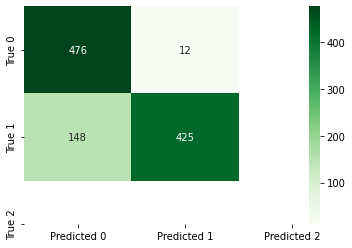

In [ ]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,y_predict)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [ ]:
df=pd.read_csv("HDFCBANK.csv",na_values=None,index_col='Date',parse_dates=True,infer_datetime_format=True)
df=df.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1)
df.head()
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,,,
2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11
2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12
2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12
2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12
2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,,,
2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11
2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12
2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12
2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12
2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12


In [ ]:
df['Volume_lag_1d'] = df['Volume'].shift(1)
Close_list = df['Close'].tolist()
direction=[]
direction.append(100)
total=len(Close_list)
print("total is",total)
for i in range(1,total):
  var1=Close_list[i]
  var2=Close_list[i-1]
  if(var1>var2):
    direction.append(1)
  elif(var1<var2):
    direction.append(0)
  elif(var1==var2):
    direction.append(2)
df1 = pd.DataFrame(direction)
df1.index=df.index
df['direction']=df1

total is 5306


**Set Target Variable and Select the Features**

In [ ]:
features = ['Prev Close','Open','High','Low','Last','VWAP','Volume_lag_1d','Close']
#df['SMA_100'] = df['Close'].rolling(100, min_periods=100).mean()
df.dropna(inplace=True)
output_var = pd.DataFrame(df['direction'])
df[features].info()
output_var.info()
df[features].head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5305 entries, 2000-01-04 to 2021-04-30
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Prev Close     5305 non-null   float64
 1   Open           5305 non-null   float64
 2   High           5305 non-null   float64
 3   Low            5305 non-null   float64
 4   Last           5305 non-null   float64
 5   VWAP           5305 non-null   float64
 6   Volume_lag_1d  5305 non-null   float64
 7   Close          5305 non-null   float64
dtypes: float64(8)
memory usage: 373.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5305 entries, 2000-01-04 to 2021-04-30
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   direction  5305 non-null   int64
dtypes: int64(1)
memory usage: 82.9 KB


,Prev Close,Open,High,Low,Last,VWAP,Volume_lag_1d,Close
Date,,,,,,,,
2000-01-04,170.00,182.00,183.45,171.00,174.00,174.99,33259.0,173.80
2000-01-05,173.80,170.00,173.90,165.00,168.00,169.20,168710.0,166.95
2000-01-06,166.95,168.00,170.00,165.30,168.95,168.44,159820.0,168.30
2000-01-07,168.30,162.15,171.00,162.15,170.75,166.79,85026.0,168.35
2000-01-10,168.35,172.90,179.50,165.00,166.30,167.79,85144.0,165.90


**K NEIGHBOURS CLASSIFIER-KNN**

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(feature_transform,output_var,test_size=0.20,random_state=1)

In [ ]:
model = KNeighborsClassifier(n_neighbors=8)

In [ ]:
model.fit(train_x,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=8)

In [ ]:
predicted_values=model.predict(test_x)
predicted_values


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,predicted_values))

ACCUIRACY SCORE
0.7408105560791706


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,predicted_values))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.69      0.81      0.74       488
           1       0.80      0.69      0.74       565
           2       0.00      0.00      0.00         8

    accuracy                           0.74      1061
   macro avg       0.50      0.50      0.50      1061
weighted avg       0.74      0.74      0.74      1061



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CONFUSION MATRIX


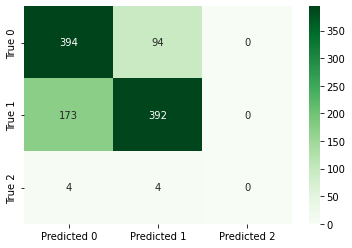

In [ ]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,predicted_values)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

**LOGISTIC REGRESSION**

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(feature_transform,output_var,test_size=0.20,random_state=1)
#BUILD A LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=1000)
log.fit(train_x,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [ ]:
#GENERATE MODEL DIAGNOSTICS
classes=log.predict(test_x)
print(classes.size)

1061


In [ ]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,classes))

ACCUIRACY SCORE
0.9010367577756834


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,classes))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       488
           1       0.86      0.98      0.91       565
           2       0.00      0.00      0.00         8

    accuracy                           0.90      1061
   macro avg       0.61      0.60      0.60      1061
weighted avg       0.90      0.90      0.90      1061



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CONFUSION MATRIX


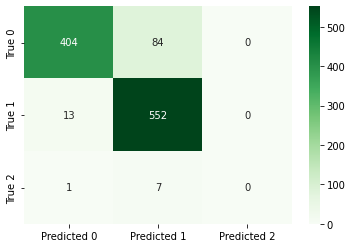

In [ ]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [ ]:
!jupyter nbconvert StockMarketPredictionClassification_AutoKeras_KNN_Logistic.ipynb

[NbConvertApp] Converting notebook StockMarketPredictionClassification_AutoKeras_KNN_Logistic.ipynb to html
[NbConvertApp] Writing 418763 bytes to StockMarketPredictionClassification_AutoKeras_KNN_Logistic.html
